#1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import os
from skimage.io import imread

#2. Import the Dataset from Roboflow Website

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wBhhcFexJ3QDDrx6zu0d")
project = rf.workspace("sdaia-xqoon").project("capstone-avmph")
dataset = project.version(8).download("tensorflow")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninsta

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Capstone-8 in tensorflow:: 100%|██████████| 12452/12452 [00:02<00:00, 5325.68it/s]


# 3. Change the Annotations of Train, Validation, and test sets

## 3.1. Change Train Annotations

In [3]:
import pandas as pd
df = pd.read_csv('/content/Capstone-8/train/_annotations.csv')
# Rename the class column to label
df.rename(columns={'class':'label'},inplace = True)
# Drop the Width, Hight columns from the annotation
df.drop(['width','height'],axis=1,inplace=True)
df.head()

,filename,label,xmin,ymin,xmax,ymax
0,e8ade2c1f9d2fb67cfc42e9bcb30514e_jpg.rf.ac4ce3...,garbage,36,318,59,333
1,39c73f33d982939742f3de50d22fcab7_jpg.rf.ad180e...,construction_waste,5,147,329,264
2,2867d05fe051716848caa71bb08a23a0_jpg.rf.ad11b3...,garbage,120,255,162,292
3,2867d05fe051716848caa71bb08a23a0_jpg.rf.ad11b3...,garbage,46,299,69,313
4,4ef6f52a2a2a2ca404f1705422cab526_jpg.rf.ac5cdb...,bad_billboard,564,271,635,314


In [4]:
# Save train annotation
df.to_csv('/content/Capstone-8/train/_annotations.csv',index=False)

In [5]:
import os
import cv2
import pandas as pd
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

# Path to the folder containing the images
image_folder = '/content/Capstone-8/train/'

# Path to the CSV file
csv_file = '/content/Capstone-8/train/_annotations.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Create a dictionary to map string labels to integer labels
label_mapping_train = {label: index for index, label in enumerate(df['label'].unique())}

# Prepare the inputs and labels for training
train_images = []
train_labels = []

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    image_name = row['filename']
    label = row['label']
    xmin = row['xmin']
    ymin = row['ymin']
    xmax = row['xmax']
    ymax = row['ymax']

    # Construct the image path
    image_path = os.path.join(image_folder, image_name)

    # Read and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = preprocess_input(img)
     # Append the preprocessed image and label to the training data
    train_images.append(img)
    train_labels.append(label_mapping_train[label])

# Convert the training data to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Convert labels to one-hot encoded format
train_labels = to_categorical(train_labels)

### 3.1.1. Normalize Train Data

In [6]:
images_train = []
for filename in df['filename']:
    img_path = os.path.join(image_folder, filename)
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = img / 255.0  # normalize pixel values
    images_train.append(img)

train_images = np.array(images_train)

## 3.2. Change Valid Annotations

In [7]:
import pandas as pd
df = pd.read_csv('/content/Capstone-8/valid/_annotations.csv')
# Rename the class column to label
df.rename(columns={'class':'label'},inplace = True)
# Drop the Width, Hight columns from the annotation
df.drop(['width','height'],axis=1,inplace=True)
df.head()

,filename,label,xmin,ymin,xmax,ymax
0,db4d5f4a2e9a47b47257108c2a4f8a5f_jpg.rf.00b8d2...,sand_on_road,2,218,640,640
1,8bcb73272c09dba9a8986765d182dfb8_jpg.rf.00c04f...,garbage,578,387,603,425
2,8bcb73272c09dba9a8986765d182dfb8_jpg.rf.00c04f...,graffiti,523,201,563,236
3,8bcb73272c09dba9a8986765d182dfb8_jpg.rf.00c04f...,graffiti,620,218,640,259
4,10f6c655e48450f087671c60ceaac251_jpg.rf.00bbe2...,bad_billboard,187,31,302,116


In [8]:
# Save valid annotation
df.to_csv('/content/Capstone-8/valid/_annotations.csv',index=False)

In [9]:
import os
import cv2
import pandas as pd
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

# Path to the folder containing the images
image_folder = '/content/Capstone-8/valid/'

# Path to the CSV file
csv_file = '/content/Capstone-8/valid/_annotations.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Create a dictionary to map string labels to integer labels
label_mapping_valid = {label: index for index, label in enumerate(df['label'].unique())}

# Prepare the inputs and labels for training
valid_images = []
valid_labels = []

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    image_name = row['filename']
    label = row['label']
    xmin = row['xmin']
    ymin = row['ymin']
    xmax = row['xmax']
    ymax = row['ymax']

    # Construct the image path
    image_path = os.path.join(image_folder, image_name)

    # Read and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = preprocess_input(img)
     # Append the preprocessed image and label to the training data
    valid_images.append(img)
    valid_labels.append(label_mapping_valid[label])

# Convert the training data to numpy arrays
valid_images = np.array(valid_images)
valid_labels = np.array(valid_labels)

# Convert labels to one-hot encoded format
valid_labels = to_categorical(valid_labels)

### 3.2.1. Normalize Valid Data

In [11]:
images_valid = []
for filename in df['filename']:
    img_path = os.path.join(image_folder, filename)
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = img / 255.0  # normalize pixel values
    images_valid.append(img)

valid_images = np.array(images_valid)

## 3.3. Change Test Annotations

In [12]:
import pandas as pd
df = pd.read_csv('/content/Capstone-8/test/_annotations.csv')
# Rename the class column to label
df.rename(columns={'class':'label'},inplace = True)
# Drop the Width, Hight columns from the annotation
df.drop(['width','height'],axis=1,inplace=True)
df.head()

,filename,label,xmin,ymin,xmax,ymax
0,9224dd81923e76fa27c143359185718d_jpg.rf.051d0f...,garbage,280,373,306,405
1,9224dd81923e76fa27c143359185718d_jpg.rf.051d0f...,construction_waste,195,329,241,435
2,20d37ff709ed6cbb8767b5ffe1753a08_jpg.rf.080a7a...,graffiti,393,144,459,262
3,20d37ff709ed6cbb8767b5ffe1753a08_jpg.rf.080a7a...,sand_on_road,410,236,518,302
4,5dbfc0f02581fc3379a6eb5b7132b939_jpg.rf.06bf23...,construction_road,0,294,394,435


In [13]:
# Save test annotation
df.to_csv('/content/Capstone-8/test/_annotations.csv',index=False)

In [14]:
import os
import cv2
import pandas as pd
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

# Path to the folder containing the images
image_folder = '/content/Capstone-8/test/'

# Path to the CSV file
csv_file = '/content/Capstone-8/test/_annotations.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Create a dictionary to map string labels to integer labels
label_mapping_test = {label: index for index, label in enumerate(df['label'].unique())}

# Prepare the inputs and labels for training
valid_images = []
valid_labels = []

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    image_name = row['filename']
    label = row['label']
    xmin = row['xmin']
    ymin = row['ymin']
    xmax = row['xmax']
    ymax = row['ymax']

    # Construct the image path
    image_path = os.path.join(image_folder, image_name)

    # Read and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = preprocess_input(img)
     # Append the preprocessed image and label to the training data
    valid_images.append(img)
    valid_labels.append(label_mapping_test[label])

# Convert the training data to numpy arrays
valid_images = np.array(valid_images)
valid_labels = np.array(valid_labels)

# Convert labels to one-hot encoded format
valid_labels = to_categorical(valid_labels)

### 3.3.1. Normalize Test Data

In [15]:
images_test = []
for filename in df['filename']:
    img_path = os.path.join(image_folder, filename)
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = img / 255.0  # normalize pixel values
    images_test.append(img)

test_images = np.array(images_test)

# 4. Build CNN model

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# Assuming you have a dataset with labeled images in X_train and corresponding labels in y_train
# Preprocess the images
  # Preprocess your training labels
image_height, image_width =224,224
num_channels = 3
# Define the CNN model
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(258, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [17]:
!pip install pydot

## 4.1. Draw the Model Architecture


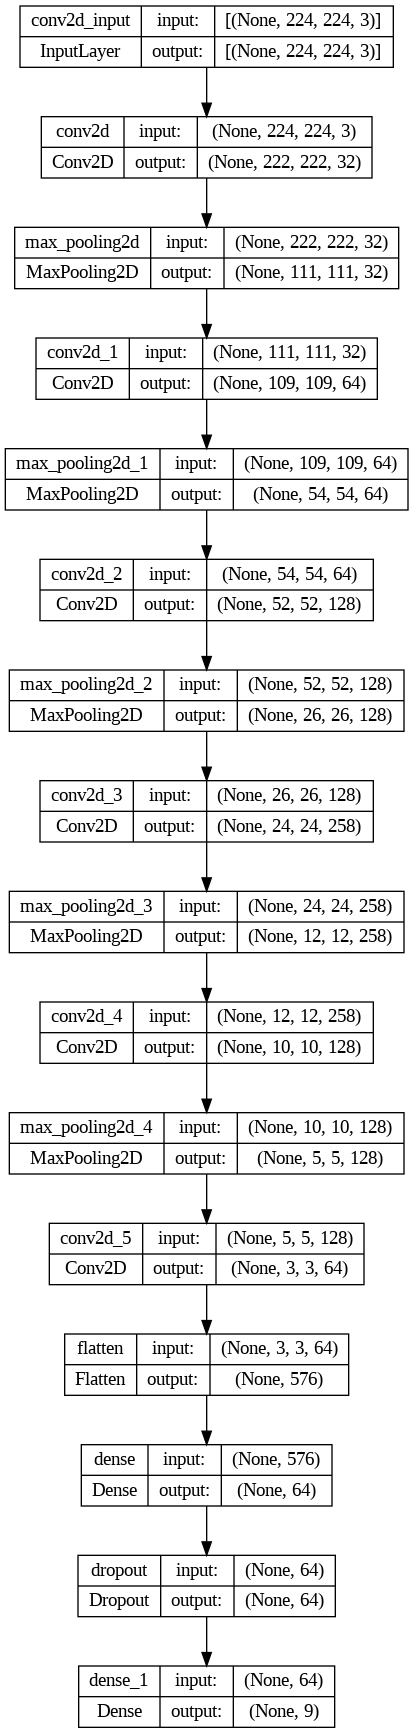

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

## 4.2. Train the Model

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_images, train_labels , validation_data=(valid_images, valid_labels ), epochs=50, batch_size=64, callbacks=[es])

Epoch 1/50
318/318 [==============================] - 24s 32ms/step - loss: 1.8855 - accuracy: 0.3397 - val_loss: 151.5029 - val_accuracy: 0.3475
Epoch 2/50
318/318 [==============================] - 9s 27ms/step - loss: 1.8286 - accuracy: 0.3512 - val_loss: 122.7470 - val_accuracy: 0.3475
Epoch 3/50
318/318 [==============================] - 9s 27ms/step - loss: 1.7837 - accuracy: 0.3513 - val_loss: 644.9163 - val_accuracy: 0.2806
Epoch 4/50
318/318 [==============================] - 9s 27ms/step - loss: 1.6718 - accuracy: 0.3947 - val_loss: 464.1123 - val_accuracy: 0.2036
Epoch 5/50
318/318 [==============================] - 8s 27ms/step - loss: 1.5692 - accuracy: 0.4415 - val_loss: 331.4992 - val_accuracy: 0.2614
Epoch 6/50
318/318 [==============================] - 9s 27ms/step - loss: 1.4866 - accuracy: 0.4658 - val_loss: 420.5954 - val_accuracy: 0.1793


## 4.3. Predict & Visulize some images

1/1 [==============================] - 0s 25ms/step
Unknown label


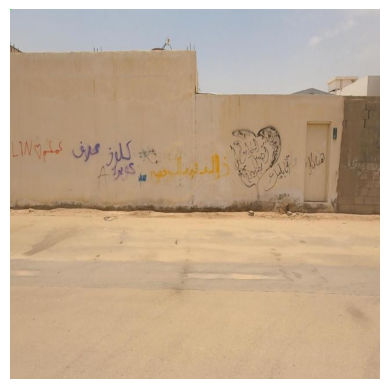

In [29]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to the image file
image_path = '/content/Capstone-8/test/04c74fb6ff31ac072c204d468ae5b7de_jpg.rf.b6bb903aa921d203fa2bf713b24c6c8c.jpg'

label_mapping_tests = {
    0: 'garbage',
    1: 'construction_waste',
    2: 'graffiti',
    3: 'sand_on_road',
    4: 'construction_road',
    5: 'potholes',
    6: 'bad_billboard',
    7: 'clutter_sidewalk',
    8: 'broken_signage',
}
# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = preprocess_input(img)

# Reshape the image to match the model's input shape
img = np.expand_dims(img, axis=0)

# Make predictions on the image using the trained model
predictions = model.predict(img)

# Get the predicted label and bounding box coordinates
predicted_label = np.argmax(predictions, axis=1)[0]

bounding_box = predictions[0, 1:]  # Assuming the 0th index corresponds to the background class

# Create a dictionary to map integer labels back to their respective string labels
label_mapping_inverse = {index: label for label, index in label_mapping_tests.items()}

# Read the image
img = cv2.imread(image_path)

# Get the image dimensions
height, width, _ = img.shape

# Extract the bounding box coordinates
xmin = int(bounding_box[0] * width)
ymin = int(bounding_box[1] * height)
xmax = int(bounding_box[2] * width)
ymax = int(bounding_box[3] * height)

# Draw the bounding box on the image
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

# Get the predicted label
predicted_label = label_mapping_inverse.get(predicted_label, "Unknown label")
print(predicted_label)

# Add the predicted label text to the image
label_text = f"Label: {predicted_label}"
cv2.putText(img, label_text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with bounding box and predicted label using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 21ms/step
Unknown label


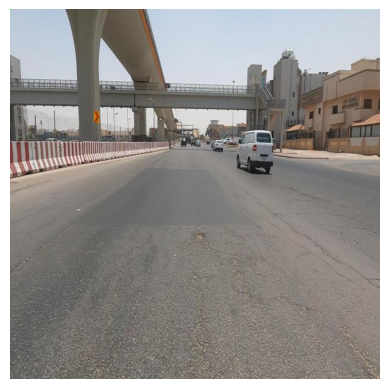

In [28]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to the image file
image_path ='/content/Capstone-8/test/3518d589fbf05f96e35a59630f5eb594_jpg.rf.b89b80c3ac3a2ce42c4d7f3877622f94.jpg'

label_mapping_tests = {
    0: 'garbage',
    1: 'construction_waste',
    2: 'graffiti',
    3: 'sand_on_road',
    4: 'construction_road',
    5: 'potholes',
    6: 'bad_billboard',
    7: 'clutter_sidewalk',
    8: 'broken_signage',
}
# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = preprocess_input(img)

# Reshape the image to match the model's input shape
img = np.expand_dims(img, axis=0)

# Make predictions on the image using the trained model
predictions = model.predict(img)

# Get the predicted label and bounding box coordinates
predicted_label = np.argmax(predictions, axis=1)[0]
bounding_box = predictions[0, 1:]  # Assuming the 0th index corresponds to the background class

# Create a dictionary to map integer labels back to their respective string labels
label_mapping_inverse = {index: label for label, index in label_mapping_tests.items()}

# Read the image
img = cv2.imread(image_path)

# Get the image dimensions
height, width, _ = img.shape

# Extract the bounding box coordinates
xmin = int(bounding_box[0] * width)
ymin = int(bounding_box[1] * height)
xmax = int(bounding_box[2] * width)
ymax = int(bounding_box[3] * height)

# Draw the bounding box on the image
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

# Get the predicted label
predicted_label = label_mapping_inverse.get(predicted_label, "Unknown label")
print(predicted_label)

# Add the predicted label text to the image
label_text = f"Label: {predicted_label}"
cv2.putText(img, label_text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with bounding box and predicted label using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 20ms/step
Unknown label


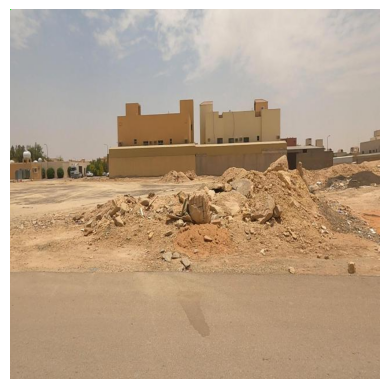

In [30]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to the image file
image_path ='/content/Capstone-8/test/59c381218eee247398087a0d8a5052cd_jpg.rf.380437fca6e565a662bd072e0359ec6d.jpg'

label_mapping_tests = {
    0: 'garbage',
    1: 'construction_waste',
    2: 'graffiti',
    3: 'sand_on_road',
    4: 'construction_road',
    5: 'potholes',
    6: 'bad_billboard',
    7: 'clutter_sidewalk',
    8: 'broken_signage',
}
# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = preprocess_input(img)

# Reshape the image to match the model's input shape
img = np.expand_dims(img, axis=0)

# Make predictions on the image using the trained model
predictions = model.predict(img)

# Get the predicted label and bounding box coordinates
predicted_label = np.argmax(predictions, axis=1)[0]
bounding_box = predictions[0, 1:]  # Assuming the 0th index corresponds to the background class

# Create a dictionary to map integer labels back to their respective string labels
label_mapping_inverse = {index: label for label, index in label_mapping_tests.items()}

# Read the image
img = cv2.imread(image_path)

# Get the image dimensions
height, width, _ = img.shape

# Extract the bounding box coordinates
xmin = int(bounding_box[0] * width)
ymin = int(bounding_box[1] * height)
xmax = int(bounding_box[2] * width)
ymax = int(bounding_box[3] * height)

# Draw the bounding box on the image
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

# Get the predicted label
predicted_label = label_mapping_inverse.get(predicted_label, "Unknown label")
print(predicted_label)

# Add the predicted label text to the image
label_text = f"Label: {predicted_label}"
cv2.putText(img, label_text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with bounding box and predicted label using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()